In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import pickle

In [2]:
df=pd.read_csv("resources/small_loans_final.csv")

In [3]:
retypes={
'loan_type':'str'
,'loan_amount_000s':'int64'
,'action_taken':'int8'
,'applicant_ethnicity':'str'
,'co_applicant_ethnicity':'str'
,'applicant_race_1':'str'
,'co_applicant_race_1':'str'
,'applicant_sex':'str'
,'co_applicant_sex':'str'
,'applicant_income_000s':'int64'}

In [4]:
# categorical fields to strings for one-hot encoding
df = df.astype(retypes)


In [5]:
X = df.drop(columns=['action_taken','Unnamed: 0'])


In [6]:
X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies

Index(['loan_amount_000s', 'applicant_income_000s', 'loan_type_1',
       'loan_type_2', 'loan_type_3', 'loan_type_4', 'applicant_ethnicity_1',
       'applicant_ethnicity_2', 'co_applicant_ethnicity_1',
       'co_applicant_ethnicity_2', 'co_applicant_ethnicity_5',
       'applicant_race_1_1', 'applicant_race_1_2', 'applicant_race_1_3',
       'applicant_race_1_4', 'applicant_race_1_5', 'co_applicant_race_1_1',
       'co_applicant_race_1_2', 'co_applicant_race_1_3',
       'co_applicant_race_1_4', 'co_applicant_race_1_5',
       'co_applicant_race_1_8', 'applicant_sex_1', 'applicant_sex_2',
       'co_applicant_sex_1', 'co_applicant_sex_2', 'co_applicant_sex_5'],
      dtype='object')


,loan_amount_000s,applicant_income_000s,loan_type_1,loan_type_2,loan_type_3,loan_type_4,applicant_ethnicity_1,applicant_ethnicity_2,co_applicant_ethnicity_1,co_applicant_ethnicity_2,...,co_applicant_race_1_2,co_applicant_race_1_3,co_applicant_race_1_4,co_applicant_race_1_5,co_applicant_race_1_8,applicant_sex_1,applicant_sex_2,co_applicant_sex_1,co_applicant_sex_2,co_applicant_sex_5
0,176,142,1,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
1,143,45,0,0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
2,337,196,1,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
3,119,86,1,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
4,218,67,1,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,236,71,1,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
49996,126,33,0,1,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
49997,156,90,1,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
49998,71,42,1,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1


In [7]:
# Split our preprocessed data into our features and target arrays

y = df['action_taken']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=42)

In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Baseline Testing

In [9]:
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [10]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()   

In [11]:
#test defaults 
test_model(LogisticRegression(), data)
test_model(AdaBoostClassifier(), data)
test_model(RandomForestClassifier(), data)
test_model(LinearSVC(), data)
test_model(DecisionTreeClassifier(), data)
test_model(ExtraTreesClassifier(), data)
test_model(KNeighborsClassifier(), data)

Model: LogisticRegression
Train score: 0.8952266666666666
Test Score: 0.89328

Model: AdaBoostClassifier
Train score: 0.8967733333333333
Test Score: 0.89328

Model: RandomForestClassifier
Train score: 0.9933866666666666
Test Score: 0.86944



/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model: LinearSVC
Train score: 0.8952266666666666
Test Score: 0.89328

Model: DecisionTreeClassifier
Train score: 0.9934666666666667
Test Score: 0.8036

Model: ExtraTreesClassifier
Train score: 0.9934666666666667
Test Score: 0.85632

Model: KNeighborsClassifier
Train score: 0.90128
Test Score: 0.88456



### Grid CV of Best Performing Classifiers

#### Logistic Regression

In [12]:
model= LogisticRegression(random_state=1)
param_grid = {
   'penalty':['l1', 'l2', 'elasticnet'],
    'C': [1.0, 0.1, 0.01],
    'solver': ['newton-cg', 'sag', 'saga', 'liblinear'],
              'max_iter': [500, 1000, 1500, 2000]}
lr_grid_clf = GridSearchCV(model, param_grid, verbose=3)
lr_grid_clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END C=1.0, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1.0, max_iter=500, penalty=l1, solver=saga;, score=0.895 total time=   3.7s
[CV 2/5] END C=1.0, max_iter=500, penalty=l1, solver=saga;, score=0.895 total time=   3.4s
[CV 3/5] END C=1.0, max_iter=500, penalty=l1, solver=saga;, score=0.895 total time=   3.3s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1.0, max_iter=500, penalty=l1, solver=saga;, score=0.895 total time=   3.4s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1.0, max_iter=500, penalty=l1, solver=saga;, score=0.895 total time=   3.4s
[CV 1/5] END C=1.0, max_iter=500, penalty=l1, solver=liblinear;, score=0.895 total time=   2.4s
[CV 2/5] END C=1.0, max_iter=500, penalty=l1, solver=liblinear;, score=0.895 total time=   1.6s
[CV 3/5] END C=1.0, max_iter=500, penalty=l1, solver=liblinear;, score=0.895 total time=   1.4s
[CV 4/5] END C=1.0, max_iter=500, penalty=l1, solver=liblinear;, score=0.895 total time=   2.1s
[CV 5/5] END C=1.0, max_iter=500, penalty=l1, solver=liblinear;, score=0.895 total time=   2.0s
[CV 1/5] END C=1.0, max_iter=500, penalty=l2, solver=newton-cg;, score=0.895 total time=   0.1s
[CV 2/5] END C=1.0, max_iter=500, penalty=l2, solver=newton-cg;, score=0.895 total time=   0.1s
[CV 3/5] END C=1.0, max_iter=500, penalty=l2, solver=newton-cg;, score=0.895 total time=   0.1s
[CV 4/5] END C=1.0, max_iter=500, penalty=l2, solver=newton-cg;, score=0.895 total time=   0.1s
[CV 5/5] END C=1.0, max_iter=500, penalty=l2,

/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1.0, max_iter=1000, penalty=l1, solver=saga;, score=0.895 total time=   7.2s
[CV 2/5] END C=1.0, max_iter=1000, penalty=l1, solver=saga;, score=0.895 total time=   3.9s
[CV 3/5] END C=1.0, max_iter=1000, penalty=l1, solver=saga;, score=0.895 total time=   3.4s
[CV 4/5] END C=1.0, max_iter=1000, penalty=l1, solver=saga;, score=0.895 total time=   6.7s
[CV 5/5] END C=1.0, max_iter=1000, penalty=l1, solver=saga;, score=0.895 total time=   6.4s
[CV 1/5] END C=1.0, max_iter=1000, penalty=l1, solver=liblinear;, score=0.895 total time=   2.4s
[CV 2/5] END C=1.0, max_iter=1000, penalty=l1, solver=liblinear;, score=0.895 total time=   1.6s
[CV 3/5] END C=1.0, max_iter=1000, penalty=l1, solver=liblinear;, score=0.895 total time=   1.4s
[CV 4/5] END C=1.0, max_iter=1000, penalty=l1, solver=liblinear;, score=0.895 total time=   2.1s
[CV 5/5] END C=1.0, max_iter=1000, penalty=l1, solver=liblinear;, score=0.895 total time=   2.1s
[CV 1/5] END C=1.0, max_iter=1000, penalty=l2, solver=n

[CV 2/5] END C=1.0, max_iter=1500, penalty=l2, solver=liblinear;, score=0.895 total time=   0.1s
[CV 3/5] END C=1.0, max_iter=1500, penalty=l2, solver=liblinear;, score=0.895 total time=   0.1s
[CV 4/5] END C=1.0, max_iter=1500, penalty=l2, solver=liblinear;, score=0.895 total time=   0.1s
[CV 5/5] END C=1.0, max_iter=1500, penalty=l2, solver=liblinear;, score=0.895 total time=   0.1s
[CV 1/5] END C=1.0, max_iter=1500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, max_iter=1500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, max_iter=1500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, max_iter=1500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, max_iter=1500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, max_iter=1500, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s


[CV 1/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.895 total time=   1.2s
[CV 2/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.895 total time=   1.6s
[CV 3/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.895 total time=   1.5s
[CV 4/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.895 total time=   1.9s
[CV 5/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.895 total time=   1.6s
[CV 1/5] END C=0.1, max_iter=500, penalty=l1, solver=liblinear;, score=0.895 total time=   0.3s
[CV 2/5] END C=0.1, max_iter=500, penalty=l1, solver=liblinear;, score=0.895 total time=   0.3s
[CV 3/5] END C=0.1, max_iter=500, penalty=l1, solver=liblinear;, score=0.895 total time=   0.3s
[CV 4/5] END C=0.1, max_iter=500, penalty=l1, solver=liblinear;, score=0.895 total time=   0.5s
[CV 5/5] END C=0.1, max_iter=500, penalty=l1, solver=liblinear;, score=0.895 total time=   0.5s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, 

[CV 4/5] END C=0.1, max_iter=1000, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1000, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=1500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1500, penalty=l1, solve

[CV 5/5] END C=0.1, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.895 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=2000, penalty=l2, solver=sag;, score=0.895 total time=   0.2s
[CV 2/5] END C=0.1, max_iter=2000, penalty=l2, solver=sag;, score=0.895 total time=   0.2s
[CV 3/5] END C=0.1, max_iter=2000, penalty=l2, solver=sag;, score=0.895 total time=   0.2s
[CV 4/5] END C=0.1, max_iter=2000, penalty=l2, solver=sag;, score=0.895 total time=   0.2s
[CV 5/5] END C=0.1, max_iter=2000, penalty=l2, solver=sag;, score=0.895 total time=   0.2s
[CV 1/5] END C=0.1, max_iter=2000, penalty=l2, solver=saga;, score=0.895 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=2000, penalty=l2, solver=saga;, score=0.895 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=2000, penalty=l2, solver=saga;, score=0.895 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=2000, penalty=l2, solver=saga;, score=0.895 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=2000, penalty=l2, solver=saga;, score=0.895 total t

[CV 5/5] END C=0.01, max_iter=500, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV

[CV 1/5] END C=0.01, max_iter=1500, penalty=l2, solver=newton-cg;, score=0.895 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=1500, penalty=l2, solver=newton-cg;, score=0.895 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=1500, penalty=l2, solver=newton-cg;, score=0.895 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=1500, penalty=l2, solver=newton-cg;, score=0.895 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=1500, penalty=l2, solver=newton-cg;, score=0.895 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=1500, penalty=l2, solver=sag;, score=0.895 total time=   0.2s
[CV 2/5] END C=0.01, max_iter=1500, penalty=l2, solver=sag;, score=0.895 total time=   0.2s
[CV 3/5] END C=0.01, max_iter=1500, penalty=l2, solver=sag;, score=0.895 total time=   0.2s
[CV 4/5] END C=0.01, max_iter=1500, penalty=l2, solver=sag;, score=0.895 total time=   0.2s
[CV 5/5] END C=0.01, max_iter=1500, penalty=l2, solver=sag;, score=0.895 total time=   0.2s
[CV 1/5] END C=0.01, max_iter=1500, penalty=l2, so

/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn

GridSearchCV(estimator=LogisticRegression(random_state=1),
             param_grid={'C': [1.0, 0.1, 0.01],
                         'max_iter': [500, 1000, 1500, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'sag', 'saga', 'liblinear']},
             verbose=3)

In [13]:
print(lr_grid_clf.best_params_)
print(lr_grid_clf.best_score_)

{'C': 1.0, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
0.8952266666666666


In [14]:
lr_best_params=lr_grid_clf.best_params_
lr_classifier= LogisticRegression(**lr_best_params, random_state=1).fit(X_train_scaled, y_train)
print(f"Training Data Score: {lr_classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr_classifier.score(X_test_scaled, y_test)}")


Training Data Score: 0.8952266666666666
Testing Data Score: 0.89328


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [15]:
# Print best to compare vs entire dataset
pickle.dump(lr_classifier, open('Resources/lr_classifier.pkl','wb'))

#### Random Forest

In [16]:
model= RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [100,150,200],
    'bootstrap' : [True, False],
    'max_features': ['sqrt', 'log2']
}
rf_grid_clf = GridSearchCV(model, param_grid, verbose=3)
rf_grid_clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END bootstrap=True, max_features=sqrt, n_estimators=100;, score=0.877 total time=   2.4s
[CV 2/5] END bootstrap=True, max_features=sqrt, n_estimators=100;, score=0.878 total time=   2.1s
[CV 3/5] END bootstrap=True, max_features=sqrt, n_estimators=100;, score=0.873 total time=   2.2s
[CV 4/5] END bootstrap=True, max_features=sqrt, n_estimators=100;, score=0.878 total time=   2.2s
[CV 5/5] END bootstrap=True, max_features=sqrt, n_estimators=100;, score=0.876 total time=   2.2s
[CV 1/5] END bootstrap=True, max_features=sqrt, n_estimators=150;, score=0.878 total time=   3.2s
[CV 2/5] END bootstrap=True, max_features=sqrt, n_estimators=150;, score=0.878 total time=   3.2s
[CV 3/5] END bootstrap=True, max_features=sqrt, n_estimators=150;, score=0.872 total time=   3.2s
[CV 4/5] END bootstrap=True, max_features=sqrt, n_estimators=150;, score=0.877 total time=   3.1s
[CV 5/5] END bootstrap=True, max_features=sqrt, n_estimat

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 150, 200]},
             verbose=3)

In [17]:
print(rf_grid_clf.best_params_)
print(rf_grid_clf.best_score_)

{'bootstrap': True, 'max_features': 'log2', 'n_estimators': 200}
0.8769866666666667


In [18]:
rf_best_params=rf_grid_clf.best_params_
rf_classifier= RandomForestClassifier(**rf_best_params, random_state=1).fit(X_train_scaled, y_train)
print(f"Training Data Score: {rf_classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf_classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9934666666666667
Testing Data Score: 0.8696


In [19]:
pickle.dump(rf_classifier, open('Resources/rf_classifier.pkl','wb'))

#### Ada Boost 

In [20]:
model= AdaBoostClassifier(random_state=1)

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 0.7],
    'algorithm':['SAMME', 'SAMME.R'],
    'n_estimators': [500, 1000, 1500]
}
ab_grid_clf = GridSearchCV(model, param_grid, verbose=3)
ab_grid_clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END algorithm=SAMME, learning_rate=0.001, n_estimators=500;, score=0.895 total time=   5.4s
[CV 2/5] END algorithm=SAMME, learning_rate=0.001, n_estimators=500;, score=0.895 total time=   5.5s
[CV 3/5] END algorithm=SAMME, learning_rate=0.001, n_estimators=500;, score=0.895 total time=   5.9s
[CV 4/5] END algorithm=SAMME, learning_rate=0.001, n_estimators=500;, score=0.895 total time=   5.5s
[CV 5/5] END algorithm=SAMME, learning_rate=0.001, n_estimators=500;, score=0.895 total time=   5.4s
[CV 1/5] END algorithm=SAMME, learning_rate=0.001, n_estimators=1000;, score=0.895 total time=  10.9s
[CV 2/5] END algorithm=SAMME, learning_rate=0.001, n_estimators=1000;, score=0.895 total time=  10.9s
[CV 3/5] END algorithm=SAMME, learning_rate=0.001, n_estimators=1000;, score=0.895 total time=  11.2s
[CV 4/5] END algorithm=SAMME, learning_rate=0.001, n_estimators=1000;, score=0.895 total time=  12.2s
[CV 5/5] END algorithm=SA

[CV 2/5] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=1000;, score=0.895 total time=  11.7s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=1000;, score=0.895 total time=  11.5s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=1000;, score=0.895 total time=  11.4s
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=1000;, score=0.895 total time=  11.4s
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=1500;, score=0.895 total time=  17.6s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=1500;, score=0.895 total time=  17.1s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=1500;, score=0.895 total time=  17.4s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=1500;, score=0.895 total time=  18.1s
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=1500;, score=0.895 total time=  17.9s
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators

GridSearchCV(estimator=AdaBoostClassifier(random_state=1),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 0.5, 0.7],
                         'n_estimators': [500, 1000, 1500]},
             verbose=3)

In [21]:
print(ab_grid_clf.best_params_)
print(ab_grid_clf.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 1000}
0.8966133333333334


In [22]:
ab_best_params=ab_grid_clf.best_params_
ab_classifier= AdaBoostClassifier(**ab_best_params, random_state=1).fit(X_train_scaled, y_train)
print(f"Training Data Score: {ab_classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {ab_classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8965866666666666
Testing Data Score: 0.8936


In [23]:
pickle.dump(ab_classifier, open('Resources/ab_classifier.pkl','wb'))

#### SVC

In [24]:
model= LinearSVC()
param_grid = {'C': [1.0, 0.1, 0.01, 0.001],
              'penalty': ['l1', 'l2'], 
            'max_iter':[1000, 1500, 2000]}
svc_grid_clf = GridSearchCV(model, param_grid, verbose=3)
svc_grid_clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ....C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ....C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ....C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ....C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ....C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..C=1.0, max_iter=1000, penalty=l2;, score=0.895 total time=   2.5s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..C=1.0, max_iter=1000, penalty=l2;, score=0.895 total time=   2.4s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..C=1.0, max_iter=1000, penalty=l2;, score=0.895 total time=   2.3s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=1.0, max_iter=1000, penalty=l2;, score=0.895 total time=   2.3s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..C=1.0, max_iter=1000, penalty=l2;, score=0.895 total time=   2.3s
[CV 1/5] END ....C=1.0, max_iter=1500, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ....C=1.0, max_iter=1500, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ....C=1.0, max_iter=1500, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ....C=1.0, max_iter=1500, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ....C=1.0, max_iter=1500, penalty=l1;, score=nan total time=   0.0s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..C=1.0, max_iter=1500, penalty=l2;, score=0.895 total time=   3.8s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..C=1.0, max_iter=1500, penalty=l2;, score=0.895 total time=   3.8s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..C=1.0, max_iter=1500, penalty=l2;, score=0.895 total time=   3.4s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=1.0, max_iter=1500, penalty=l2;, score=0.895 total time=   3.6s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..C=1.0, max_iter=1500, penalty=l2;, score=0.895 total time=   3.6s
[CV 1/5] END ....C=1.0, max_iter=2000, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ....C=1.0, max_iter=2000, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ....C=1.0, max_iter=2000, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ....C=1.0, max_iter=2000, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ....C=1.0, max_iter=2000, penalty=l1;, score=nan total time=   0.0s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..C=1.0, max_iter=2000, penalty=l2;, score=0.895 total time=   4.7s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..C=1.0, max_iter=2000, penalty=l2;, score=0.895 total time=   4.6s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..C=1.0, max_iter=2000, penalty=l2;, score=0.895 total time=   4.9s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=1.0, max_iter=2000, penalty=l2;, score=0.895 total time=   4.7s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..C=1.0, max_iter=2000, penalty=l2;, score=0.895 total time=   4.5s
[CV 1/5] END ....C=0.1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ....C=0.1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ....C=0.1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ....C=0.1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..C=0.1, max_iter=1000, penalty=l2;, score=0.895 total time=   2.3s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..C=0.1, max_iter=1000, penalty=l2;, score=0.895 total time=   2.4s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..C=0.1, max_iter=1000, penalty=l2;, score=0.895 total time=   2.8s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=0.1, max_iter=1000, penalty=l2;, score=0.895 total time=   3.0s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..C=0.1, max_iter=1000, penalty=l2;, score=0.895 total time=   2.4s
[CV 1/5] END ....C=0.1, max_iter=1500, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.1, max_iter=1500, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ....C=0.1, max_iter=1500, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ....C=0.1, max_iter=1500, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ....C=0.1, max_iter=1500, penalty=l1;, score=nan total time=   0.0s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..C=0.1, max_iter=1500, penalty=l2;, score=0.895 total time=   3.7s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..C=0.1, max_iter=1500, penalty=l2;, score=0.895 total time=   3.5s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..C=0.1, max_iter=1500, penalty=l2;, score=0.895 total time=   3.6s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=0.1, max_iter=1500, penalty=l2;, score=0.895 total time=   3.6s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..C=0.1, max_iter=1500, penalty=l2;, score=0.895 total time=   3.6s
[CV 1/5] END ....C=0.1, max_iter=2000, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.1, max_iter=2000, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ....C=0.1, max_iter=2000, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ....C=0.1, max_iter=2000, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ....C=0.1, max_iter=2000, penalty=l1;, score=nan total time=   0.0s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..C=0.1, max_iter=2000, penalty=l2;, score=0.895 total time=   4.6s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..C=0.1, max_iter=2000, penalty=l2;, score=0.895 total time=   4.7s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..C=0.1, max_iter=2000, penalty=l2;, score=0.895 total time=   4.7s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=0.1, max_iter=2000, penalty=l2;, score=0.895 total time=   4.7s


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..C=0.1, max_iter=2000, penalty=l2;, score=0.895 total time=   5.1s
[CV 1/5] END ...C=0.01, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.01, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.01, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.01, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.01, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END .C=0.01, max_iter=1000, penalty=l2;, score=0.895 total time=   0.5s
[CV 2/5] END .C=0.01, max_iter=1000, penalty=l2;, score=0.895 total time=   0.5s
[CV 3/5] END .C=0.01, max_iter=1000, penalty=l2;, score=0.895 total time=   0.5s
[CV 4/5] END .C=0.01, max_iter=1000, penalty=l2;, score=0.895 total time=   0.4s
[CV 5/5] END .C=0.01, max_iter=1000, penalty=l2;, score=0.895 total time=   0.5s
[CV 1/5] END ...C=0.01, max_iter=1500, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.01, max_

/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [1.0, 0.1, 0.01, 0.001],
                         'max_iter': [1000, 1500, 2000],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [25]:
print(svc_grid_clf.best_params_)
print(svc_grid_clf.best_score_)

{'C': 1.0, 'max_iter': 1000, 'penalty': 'l2'}
0.8952266666666666


In [26]:
svc_best_params=svc_grid_clf.best_params_
svc_classifier= LinearSVC(**svc_best_params).fit(X_train_scaled, y_train)
print(f"Training Data Score: {svc_classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svc_classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8951733333333334
Testing Data Score: 0.89312


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [27]:
pickle.dump(svc_classifier, open('Resources/svc_classifier.pkl','wb'))

#### KNeighbors Classifier

k: 1, Train/Test Score: 0.993/0.819
k: 3, Train/Test Score: 0.910/0.869
k: 5, Train/Test Score: 0.901/0.885
k: 7, Train/Test Score: 0.898/0.889
k: 9, Train/Test Score: 0.897/0.891
k: 11, Train/Test Score: 0.896/0.892
k: 13, Train/Test Score: 0.896/0.892
k: 15, Train/Test Score: 0.896/0.893
k: 17, Train/Test Score: 0.896/0.893
k: 19, Train/Test Score: 0.895/0.893


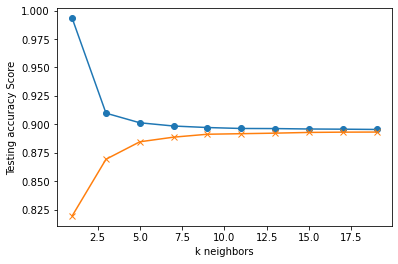

In [28]:
# Find N value

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [30]:
model= KNeighborsClassifier()

param_grid = {
    'n_neighbors': [9,11,13,15],
    'weights': ['uniform', 'distance'],
    'leaf_size': [30, 50, 100, 200]
}
knn_grid_clf = GridSearchCV(model, param_grid, verbose=3)
knn_grid_clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END leaf_size=30, n_neighbors=9, weights=uniform;, score=0.893 total time=   7.1s
[CV 2/5] END leaf_size=30, n_neighbors=9, weights=uniform;, score=0.895 total time=   7.1s
[CV 3/5] END leaf_size=30, n_neighbors=9, weights=uniform;, score=0.894 total time=   6.8s
[CV 4/5] END leaf_size=30, n_neighbors=9, weights=uniform;, score=0.893 total time=   4.5s
[CV 5/5] END leaf_size=30, n_neighbors=9, weights=uniform;, score=0.895 total time=   7.0s
[CV 1/5] END leaf_size=30, n_neighbors=9, weights=distance;, score=0.881 total time=   4.9s
[CV 2/5] END leaf_size=30, n_neighbors=9, weights=distance;, score=0.884 total time=   5.2s
[CV 3/5] END leaf_size=30, n_neighbors=9, weights=distance;, score=0.881 total time=   4.6s
[CV 4/5] END leaf_size=30, n_neighbors=9, weights=distance;, score=0.883 total time=   3.6s
[CV 5/5] END leaf_size=30, n_neighbors=9, weights=distance;, score=0.884 total time=   3.8s
[CV 1/5] END leaf_size=

[CV 5/5] END leaf_size=100, n_neighbors=9, weights=distance;, score=0.884 total time=   3.1s
[CV 1/5] END leaf_size=100, n_neighbors=11, weights=uniform;, score=0.894 total time=   3.7s
[CV 2/5] END leaf_size=100, n_neighbors=11, weights=uniform;, score=0.895 total time=   4.5s
[CV 3/5] END leaf_size=100, n_neighbors=11, weights=uniform;, score=0.894 total time=   3.9s
[CV 4/5] END leaf_size=100, n_neighbors=11, weights=uniform;, score=0.894 total time=   3.4s
[CV 5/5] END leaf_size=100, n_neighbors=11, weights=uniform;, score=0.895 total time=   3.6s
[CV 1/5] END leaf_size=100, n_neighbors=11, weights=distance;, score=0.884 total time=   4.0s
[CV 2/5] END leaf_size=100, n_neighbors=11, weights=distance;, score=0.887 total time=   4.1s
[CV 3/5] END leaf_size=100, n_neighbors=11, weights=distance;, score=0.882 total time=   4.1s
[CV 4/5] END leaf_size=100, n_neighbors=11, weights=distance;, score=0.885 total time=   3.2s
[CV 5/5] END leaf_size=100, n_neighbors=11, weights=distance;, sco

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [30, 50, 100, 200],
                         'n_neighbors': [9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [31]:
print(knn_grid_clf.best_params_)
print(knn_grid_clf.best_score_)

{'leaf_size': 30, 'n_neighbors': 15, 'weights': 'uniform'}
0.8950933333333333


In [33]:
knn_best_params=knn_grid_clf.best_params_
kn_classifier= KNeighborsClassifier(**knn_best_params).fit(X_train_scaled, y_train)
print(f"Training Data Score: {kn_classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {kn_classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8958133333333334
Testing Data Score: 0.8928


In [34]:
pickle.dump(kn_classifier, open('Resources/kn_classifier.pkl','wb'))